In [31]:
import pandas as pd
pd.set_option('max_colwidth', 80)

import re

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

import spacy
nlp = spacy.load('en_core_web_sm')

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
 
    pattern1 = 'RT'              # RT's
    pattern2 = r'http\S+'        # URL's
    pattern3 = '@[\w_]+'         # mentions
    pattern4 = r'[^\x00-\x7F]+'  # emojis
    pattern5 = '(\n)'            # break lines
    pattern6 = '#'               # hashtag symbols (#), but will keep the text after since it (potentially) carries info 
    pattern7 = '&[\w_]+'         # unnecessary strings starting with &, such as &dsfsf
    pattern8 = '[^\w\s]'         # punctuation
   
    pattern = r'|'.join((pattern1, pattern2, pattern3, pattern4, pattern5, pattern6, pattern7, pattern8))
    s = re.sub(pattern, '', s)
            

    return s
    
    
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

def lemmatize(s):
    
    # Lemmatizing the tweets:
    
    tweet = [word.lemma_ for word in nlp(s)]
    return " ".join(tweet)

def part_of_speech(s):
    
    # Adding the part of speech next to each word in a tweet:
    
    tweet = [word.text + '->' + word.pos_ for word in nlp(s)]
    return " ".join(tweet)    

In [9]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [32]:
X[:20] # The original tweets

0     RT @LilMissRightie: Here's CNN on Sharia law. You can be stoned or have your...
1     RT @NetworksManager: LOOK obama Clinton cronies ILLEGALLY arm &amp; train mu...
2     RT @GrrrGraphics: #ThrowbackThursday #BenGarrison #cartoon from 2013 #Obama ...
3     RT @PeterTownsend7: Say 'Islam is peace', or else!  #trump #maga #isis #tcot...
4     RT @ToddDracula: @realDonaldTrump All aboard the Trump Train! #ChooChoo 🚂 ht...
5     RT @JudicialWatch: FLASHBACK &gt;&gt; Judicial Watch Releases Huma Abedin De...
6     RT @LouDobbs: Following FBI presser, @realDonaldTrump says “the system is ri...
7     RT @Ricky_Vaughn99: Trump: "We're Running Against a Rigged Press" https://t....
8     RT @mitchellvii: Literally 98% of Hillary supporters I see online are astrot...
9     RT @ClarkW2016: @ConstantinCI @CathyTo47590555 \nIslam. ... https://t.co/8Fw...
10    RT @MightyBusterBro: .\nPSYCHO - MOTHER\nHillary at her most EVIL.\n\n#MAGA ...
11    RT @ThomasPKennedy3: The unthinkable has happene

In [33]:
X.map(clean_twitter) # The cleaned up tweets

0         Heres CNN on Sharia law You can be stoned or have your hands cut off but B...
1         LOOK obama Clinton cronies ILLEGALLY arm  train muslims terrorist includin...
2         ThrowbackThursday BenGarrison cartoon from 2013 Obama gets crowned War Deb...
3                                   Say Islam is peace or else  trump maga isis tcot   
4                                                 All aboard the Trump Train ChooChoo  
5                  FLASHBACK  Judicial Watch Releases Huma Abedin Deposition Testimony 
6               Following FBI presser  says the system is rigged    weigh in FoxLDT 7pm
7                                            Trump Were Running Against a Rigged Press 
8         Literally 98 of Hillary supporters I see online are astroturfed spammers w...
9                                                                               Islam  
10        PSYCHO  MOTHERHillary at her most EVILMAGA  BasketOfDeplorables NeverHilla...
11        The unthinkable has ha

In [34]:
clean = X.map(clean_twitter) # the new series of clean tweets

In [35]:
clean[:10].map(lemmatize)    # some lemmatized tweets:

0       heres cnn on sharia law -PRON- can be stone or have -PRON- hand cut off b...
1       look obama clinton crony illegally arm   train muslim terrorist include i...
2       throwbackthursday bengarrison cartoon from 2013 obama get crown war debt ...
3                               say islam be peace or else   trump maga isis tcot   
4                                              all aboard the trump train choochoo  
5               flashback   judicial watch releases huma abedin deposition testimony
6              follow fbi presser   say the system be rig     weigh in foxldt 7 p.m.
7                                                trump be run against a rigged press
8       literally 98 of hillary supporter -PRON- see online be astroturf spammer ...
9                                                                            islam  
Name: tweet, dtype: object

In [36]:
clean[:10].map(part_of_speech) # identifiying the parts of speech in a tweet:

0      ->SPACE Heres->PROPN CNN->PROPN on->ADP Sharia->PROPN law->NOUN You->PRON ...
1      ->SPACE LOOK->VERB obama->ADP Clinton->PROPN cronies->NOUN ILLEGALLY->ADV ...
2      ->SPACE ThrowbackThursday->PROPN BenGarrison->PROPN cartoon->NOUN from->AD...
3      ->SPACE Say->VERB Islam->PROPN is->VERB peace->NOUN or->CCONJ else->ADV  -...
4       ->SPACE All->DET aboard->ADP the->DET Trump->PROPN Train->PROPN ChooChoo-...
5      ->SPACE FLASHBACK->PROPN  ->SPACE Judicial->PROPN Watch->PROPN Releases->P...
6      ->SPACE Following->VERB FBI->PROPN presser->NOUN  ->SPACE says->VERB the->...
7      ->SPACE Trump->PROPN Were->VERB Running->VERB Against->ADP a->DET Rigged->...
8      ->SPACE Literally->ADV 98->NUM of->ADP Hillary->PROPN supporters->NOUN I->...
9                                                      ->SPACE Islam->PROPN  ->SPACE
Name: tweet, dtype: object

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

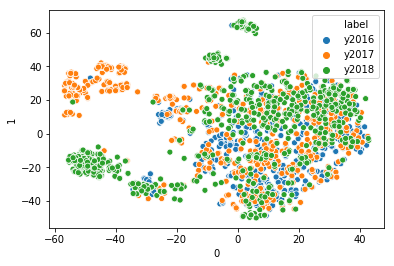

In [38]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

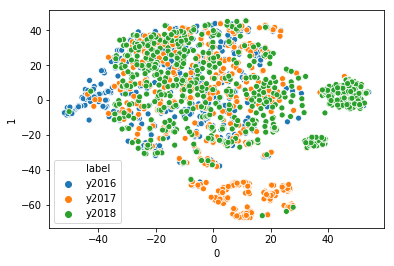

In [39]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'heres', 'hes', 'hows', 'id', 'ill', 'im', 'isnt', 'ive', 'lets', 'mustnt', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'thats', 'theres', 'theyd', 'theyll', 'theyre', 'theyve', 'wasnt', 'wed', 'well', 'werent', 'weve', 'whats', 'whens', 'wheres', 'whos', 'whys', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


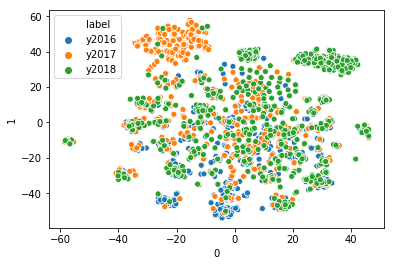

In [40]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

# pip install stop-words

from stop_words import get_stop_words

stop_words = get_stop_words('english')

vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words = stop_words)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)